<img src="images/trace.png" style="float:right;width:100px;"> 

# Dillute trace elements - partitioning concept

In [19]:
options(repr.plot.width=5.5, repr.plot.height=4.5) # Size for the Jupyter plot (inches)
options(jupyter.plot_mimetypes = "image/png")        # Change mimetype to PNG

# Using image/svg+xml
# May not work in some browsers (but is optimal for Chrome, Firefox...)
options(repr.plot.width=5, repr.plot.height=5)
options(jupyter.plot_mimetypes = "image/svg+xml") 

In [20]:
# Run the GCDkit library (if available)
exe.dir<-getwd()
libs<-library(GCDkit, warn.conflicts=FALSE,quietly=FALSE,verbose=TRUE) # Make less verbose
options(gcd.shut.up=TRUE)
print(libs)
setwd(exe.dir)

[1] "GCDkit"    "tcltk"     "stats"     "graphics"  "grDevices" "utils"    
[7] "datasets"  "methods"   "base"     


### 14.2: Fractional crystallization (direct trc)
<img src="images/exercise-icon.png" style="float:left;width:40px;height:40px;">
The following file shows the REE concentrations in a tonalitic magma (ppm), as well as the partition coefficients for crystallizing mineral phases: 

<div style="text-align: right"> 
<img src="images/floppy.png" style="float:right;width:30px;height:30px;">
ttg_a.data </div>

A differentiated magma is generated by 30% fractional crystallization of a parental magma (H34); the cumulate consists of plagioclase, hornblende and ilmenite.
* Calculate the differentiated magma composition for a cumulate made up of 49 % plagioclase, 49 % hornblende, and 2 % ilmenite.
* By means of the *GCDkit* function `spider`, plot chondrite-normalized REE patterns (using normalization values after Boynton 1984).
<div style="text-align: right"> 
<img src="images/floppy.png" style="float:right;width:30px;height:30px;">
boynton.data </div>

In [21]:
x <- read.table("data/ttg_a.data",sep="\t")
x <- as.matrix(x)               # transform dataframe to matrix
print(x)

   Source.H34    Pl   Amp    Ilm
La     32.040 0.400  0.74 0.0050
Ce     61.900 0.270  1.52 0.0060
Nd     25.750 0.210  4.26 0.0075
Sm      3.970 0.130  7.77 0.0100
Eu      0.966 2.150  5.14 0.0070
Gd      2.300 0.097 10.00 0.0170
Dy      1.160 0.064 13.00 0.0280
Er      0.460 0.055 12.00 0.0350
Yb      0.370 0.049  8.40 0.0750
Lu      0.057 0.046  6.00 0.1000


In [22]:
c0 <- x[,1]                     # parental magma composition
kd <- x[,-1]                    # table of distribution coefficients
fc <- 0.3                       # degree of fractionation
ff <- 1-fc                      # fraction of the melt left 
m1 <- c(0.49,0.49,0.02)         # mineral props in cumulate (1)

dd1 <- kd%*%m1                  # bulk distrib. coeff. [Eq.(10.4)]

cl1 <- c0*ff^(dd1-1)            # melt composition, Rayleigh equation [Eq. (11.5)]

cs1 <- dd1*cl1                  # instantaneous solid [Eq. (11.8)]
csavg1 <- c0*(1-ff^dd1)/(1-ff)  # average solid [Eq. (11.9)]

result <- cbind(c0,dd1,cs1,csavg1,cl1)
colnames(result) <- c("C0","D1","CS1","CSavg1","CL1")

print(round(cbind(x,result),2))

   Source.H34   Pl   Amp  Ilm    C0   D1   CS1 CSavg1   CL1
La      32.04 0.40  0.74 0.00 32.04 0.56 20.95  19.30 37.50
Ce      61.90 0.27  1.52 0.01 61.90 0.88 56.73  55.43 64.67
Nd      25.75 0.21  4.26 0.01 25.75 2.19 36.89  46.54 16.84
Sm       3.97 0.13  7.77 0.01  3.97 3.87  5.52   9.91  1.43
Eu       0.97 2.15  5.14 0.01  0.97 3.57  1.38   2.32  0.39
Gd       2.30 0.10 10.00 0.02  2.30 4.95  2.78   6.35  0.56
Dy       1.16 0.06 13.00 0.03  1.16 6.40  1.08   3.47  0.17
Er       0.46 0.06 12.00 0.04  0.46 5.91  0.47   1.35  0.08
Yb       0.37 0.05  8.40 0.07  0.37 4.14  0.50   0.95  0.12
Lu       0.06 0.05  6.00 0.10  0.06 2.96  0.08   0.12  0.03


     La   Ce Pr   Nd    Sm    Eu   Gd Tb    Dy Ho   Er Tm    Yb    Lu
C0  103 76.6 NA 42.9 20.36 13.14 8.88 NA 3.602 NA 2.19 NA 1.770 1.770
CL1 121 80.0 NA 28.1  7.31  5.25 2.17 NA 0.525 NA 0.38 NA 0.577 0.878


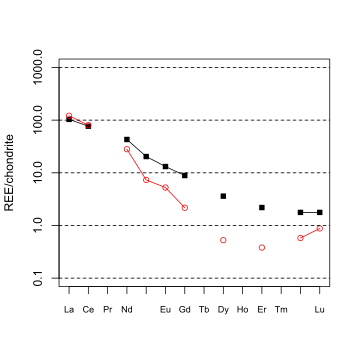

In [23]:
# Read the chondritic REE abundances (Boynton 1984) 
x <- read.table("data/boynton.data",sep=",")
chondrite <- as.numeric(x) # conversion to numeric vector
names(chondrite) <- names(x) 

# Append empty rows for elements not modelled
ii <- !names(chondrite)%in%rownames(result)   # determine the missing REE
names.ii <- names(chondrite)[ii]
missing <- matrix(NA,nrow=length(names.ii),ncol=2,dimnames=list(names.ii,c("C0","CL1")))
result <- rbind(result[,c("C0","CL1")],missing) 
result <- result[names(chondrite),]

# Normalization by chondritic abundances
y <- result/chondrite
print(t(y),3)

# Plot
plot(y[,1],type="o",log="y",axes=FALSE,xlab="",ylab="REE/chondrite",ylim=c(0.1,1000),pch=15,col="black")
axis(1,1:length(chondrite),labels=names(chondrite),cex.axis=0.75)
axis(2)
points(y[,2],type="o",pch=1,col="red")
abline(h=(10^(-1:3)),lty="dashed")
box()

In [24]:
# If GCDkit is available, make a spiderplot
data <- t(result[,c("C0","CL1")])
print(data)

          La       Ce Pr       Nd       Sm        Eu        Gd Tb        Dy Ho
C0  32.04000 61.90000 NA 25.75000 3.970000 0.9660000 2.3000000 NA 1.1600000 NA
CL1 37.50168 64.67099 NA 16.84125 1.425726 0.3859509 0.5625939 NA 0.1689235 NA
            Er Tm        Yb         Lu
C0  0.46000000 NA 0.3700000 0.05700000
CL1 0.07990119 NA 0.1206634 0.02828549


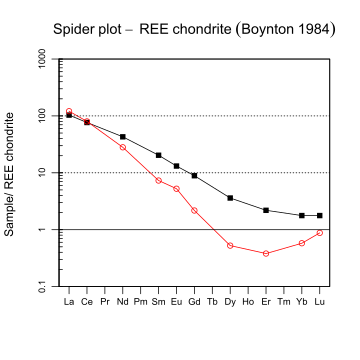

In [25]:
spider(data,"Boynton",0.1,1000,pch=c(15,1),col=c("black","red"),new=TRUE)
figRedraw()

### 15.1: Fractional crystallization (reversed Ex. 14.2)

<img src="images/exercise-icon.png" style="float:left;width:40px;height:40px;">
The following file contains trace-element compositions of two tonalites, a primitive WR1 and a differentiated WR2, together with corresponding partition coefficients for the relevant rock-forming minerals.


<div style="text-align: right"> 
<img src="images/floppy.png" style="float:right;width:30px;height:30px;">
ttg_a2.data </div>

Let’s assume that `WR1` and `WR2` represent pure compositions of a tonalitic melt differentiating by Rayleigh-type fractional crystallization.
* Using the least-square method, estimate the modal composition of the cumulate and the degree of fractional crystallization.

In [26]:
x <- read.table("data/ttg_a2.data",sep="\t")
x <- data.matrix(x)
print(x)

                      WR1    WR2    Pl   Amp    Ilm
La                 32.040 37.502 0.400  0.74 0.0050
Ce                 61.900 64.671 0.270  1.52 0.0060
Nd                 25.750 16.841 0.210  4.26 0.0075
Sm                  3.970  1.426 0.130  7.77 0.0100
Eu                  0.966  0.386 2.150  5.14 0.0070
Gd                  2.300  0.563 0.097 10.00 0.0170
Dy                  1.160  0.169 0.064 13.00 0.0280
Er                  0.460  0.080 0.055 12.00 0.0350
Yb                  0.370  0.121 0.049  8.40 0.0750
Lu                  0.057  0.028 0.046  6.00 0.1000


In [27]:
dmat <- x[,-(1:2)]-1    # partitioning coeffs - 1 [Eq. (12.3)]
cv <- log(x[,2]/x[,1])  # log ratios of differentiated/parental magma comp. [Eq. (12.4)]

ee <- lsfit(dmat,cv,intercept=FALSE)
mm <- ee$coeff
ff <- exp(sum(mm))      # fraction of melt remaining [Eq.(13.7)]

cat(round((1-ff)*100,1),"% fractional crystallization ","\n")
m <- mm/log(ff)*100     # mineral percentages [Eq. (13.8)]
print(round(m,1))

29.9 % fractional crystallization  
  Pl  Amp  Ilm 
49.0 49.2  1.8 


**References**

Boynton WV (1984) Cosmochemistry of the rare earth elements: meteorite studies. 
In: Henderson P (eds) Rare Earth Element Geochemistry. Elsevier, Amsterdam, pp 63-114